In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading .npy files
The exercises for this chapter will use a NumPy array holding an image in RGB format. Which image? You'll have to load the array from the mystery_image.npy file to find out!

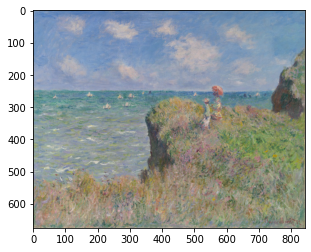

In [4]:
# Load the mystery_image.npy file using the alias f, saving the contents as an array called rgb_array.

with open(r"datasets\rgb_array.npy", "rb") as f:
    rgb_array = np.load(f)

plt.imshow(rgb_array)
plt.show()

### Getting help
You'll need to use the .astype() array method we covered in the first chapter of this course for the next exercise. If you forget exactly how .astype() works, you could check out the course slides or NumPy's documentation on numpy.org. There is, however, an even faster way to jog your memory…

In [10]:
# Return NumPy's documentation text for .astype().

help(np.ndarray.astype)

Help on method_descriptor:

astype(...)
    a.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)
    
    Copy of the array, cast to a specified type.
    
    Parameters
    ----------
    dtype : str or dtype
        Typecode or data-type to which the array is cast.
    order : {'C', 'F', 'A', 'K'}, optional
        Controls the memory layout order of the result.
        'C' means C order, 'F' means Fortran order, 'A'
        means 'F' order if all the arrays are Fortran contiguous,
        'C' order otherwise, and 'K' means as close to the
        order the array elements appear in memory as possible.
        Default is 'K'.
    casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
        Controls what kind of data casting may occur. Defaults to 'unsafe'
        for backwards compatibility.
    
          * 'no' means the data types should not be cast at all.
          * 'equiv' means only byte-order changes are allowed.
          * 'safe' means only cas

### Update and save
Perhaps you are training a machine learning model to recognize ocean scenes. You'd like the model to understand that oceans are not only associated with bright, summery colors, so you're careful to include images of oceans in bad whether or evening light as well. You may have to manually transform some images in order to balance the data, so your task is to darken the Monet ocean scene rgb_array.

In [13]:
# Reduce every value in rgb_array by 50 percent, saving the resulting array as darker_rgb_array.

darker_rgb_array = rgb_array*0.5

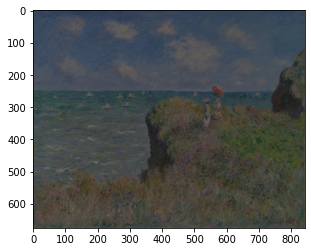

In [16]:
# Since RGB values must be integers, convert darker_rgb_array into an array of integers called darker_rgb_int_array so that it can be plotted.

# Convert darker_rgb_array into an array of integers
darker_rgb_int_array = darker_rgb_array.astype('int')
plt.imshow(darker_rgb_int_array)
plt.show()

In [18]:
# Save darker_rgb_int_array as an .npy file called darker_monet.npy using the alias f.
# Save darker_rgb_int_array to an .npy file called darker_monet.npy
with open("darker_monet.npy", "wb") as f:
    np.save(f, darker_rgb_int_array)

### Augmenting Monet
Perhaps you're still working on that machine learning model that identifies ocean scenes in paintings. You'd like to generate a few extra images to augment your existing data. After all, a human can tell that a painting is of an ocean even if the painting is upside-down: why shouldn't your machine learning model?

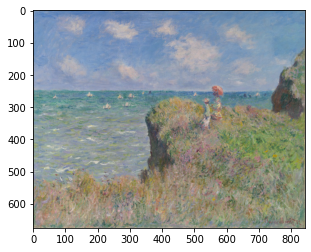

In [22]:

plt.imshow(rgb_array)
plt.show()

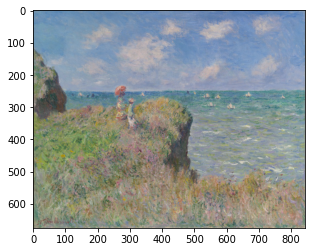

In [23]:
# Flip rgb_array so that it is the mirror image of the original, with the ocean on the right and grassy knoll on the left.
# Flip rgb_array so that it is the mirror image of the original
mirrored_monet = np.flip(rgb_array,axis=1)
plt.imshow(mirrored_monet)
plt.show()

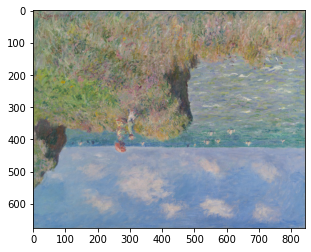

In [26]:
# Flip rgb_array so that it is upside down but otherwise remains the same.
mirrored_monet = np.flip(rgb_array,axis=(0,1))
plt.imshow(mirrored_monet)
plt.show()

### Transposing your masterpiece
You've learned that transposing an array reverses the order of the array's axes. To transpose the axes in a different order, you can pass the desired axes order as arguments.

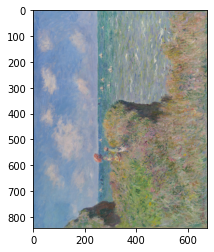

In [27]:
# Transpose the 3-D rgb_array so that the image appears rotated 90 degrees left and as a mirror image of itself.
# Transpose rgb_array
transposed_rgb = np.transpose(rgb_array,axes=(1,0,2))
plt.imshow(transposed_rgb)
plt.show()

### 2D split and stack
Splitting and stacking skills aren't just useful with 3D RGB arrays: they are excellent for subsetting and organizing data of any type and dimension!

You'll now take a quick trip down memory lane to reorganize the monthly_sales array as a 3D array. Recall that the first dimension of monthly_sales is rows of a single month's sales across three industries, and the second dimension is columns of monthly sales data for a single industry.

In [28]:
with open(r"datasets\monthly_sales.npy", "rb") as f:
    monthly_sales = np.load(f)

In [30]:
# Split monthly_sales into four arrays representing quarterly data across industries; print q1_sales.

# Split monthly_sales into quarterly data
q1_sales, q2_sales, q3_sales, q4_sales = np.split(monthly_sales,4,axis=0)
print(q1_sales)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]]


In [31]:
# Stack the four quarterly sales arrays to create a 3D array, quarterly_sales,
# made up of the four quarterly 2D arrays in order from the first to last quarter.
# Stack the four quarterly sales arrays
quarterly_sales = np.stack([q1_sales, q2_sales, q3_sales, q4_sales],axis=0)
print(quarterly_sales)

[[[ 4134 23925  8657]
  [ 4116 23875  9142]
  [ 4673 27197 10645]]

 [[ 4580 25637 10456]
  [ 5109 27995 11299]
  [ 5011 27419 10625]]

 [[ 5245 27305 10630]
  [ 5270 27760 11550]
  [ 4680 24988  9762]]

 [[ 4913 25802 10456]
  [ 5312 25405 13401]
  [ 6630 27797 18403]]]


### Splitting RGB data
Perhaps you'd like to better understand Monet's use of the color blue. Your task is to create a version of the Monet rgb_array that emphasizes parts of the painting that use lots of blue by making them even bluer! You'll perform the splitting portion of this task in this exercise and the stacking portion in the next.

In [32]:
rgb_array

array([[[117, 141, 175],
        [120, 145, 176],
        [121, 146, 177],
        ...,
        [116, 147, 168],
        [117, 145, 167],
        [117, 145, 166]],

       [[126, 151, 182],
        [118, 143, 174],
        [118, 143, 174],
        ...,
        [118, 149, 170],
        [116, 147, 168],
        [117, 145, 167]],

       [[128, 152, 180],
        [129, 153, 181],
        [133, 156, 187],
        ...,
        [117, 147, 171],
        [114, 144, 168],
        [111, 141, 165]],

       ...,

       [[191, 182, 167],
        [191, 180, 162],
        [182, 170, 146],
        ...,
        [142, 135, 107],
        [155, 146, 115],
        [160, 147, 113]],

       [[190, 181, 166],
        [201, 190, 172],
        [189, 177, 153],
        ...,
        [144, 137, 109],
        [158, 149, 118],
        [164, 151, 117]],

       [[163, 154, 139],
        [191, 180, 160],
        [183, 171, 147],
        ...,
        [147, 140, 112],
        [164, 153, 121],
        [171, 158, 124]]

In [35]:
# Split the Monet rgb_array into red, green, and blue only pixel data; save the results as as red_array, green_array, and blue_array.
# Split rgb_array into red, green, and blue arrays
red_array, green_array, blue_array = np.split(rgb_array, 3, axis=2)

In [44]:
# Create emphasized_blue_array, which replaces blue_array values with 255 if they are higher than the mean value
# of blue_array; otherwise, the value remains the same.
# Print the .shape of emphasized_blue_array.

# Create emphasized_blue_array
emphasized_blue_array = np.where(blue_array > blue_array.mean(), 255,blue_array)

# Print the shape of emphasized_blue_array
print(emphasized_blue_array.shape)

(675, 843, 1)


In [45]:
# Reshape emphasized_blue_array to remove the trailing third dimension; save as emphasized_blue_array_2D.
# Remove the trailing dimension from emphasized_blue_array
emphasized_blue_array_2D = emphasized_blue_array.reshape(675, 843)

### Stacking RGB data
Now you'll combine red_array, green_array, and emphasized_blue_array_2D to see what Monet's painting looks like with the blues emphasized!

In [46]:
# Print the shapes of blue_array and emphasized_blue_array_2D.
print(blue_array.shape, emphasized_blue_array_2D.shape)

(675, 843, 1) (675, 843)


In [47]:
red_array.shape,green_array.shape

((675, 843, 1), (675, 843, 1))

In [48]:
# Reshape red_array and green_array so that they can be stacked with emphasized_blue_array_2D.
# Reshape red_array and green_array
red_array_2D = red_array.reshape(675,843)
green_array_2D = green_array.reshape(675,843)

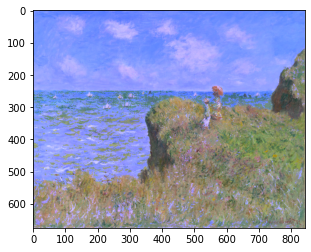

In [50]:
# Stack red_array_2D, green_array_2D, and emphasized_blue_array_2D together (in that order) into a 3D array called emphasized_blue_monet.
# Stack red_array_2D, green_array_2D, and emphasized_blue_array_2D
emphasized_blue_monet = np.stack([red_array_2D,green_array_2D,emphasized_blue_array_2D],axis=2)
plt.imshow(emphasized_blue_monet)
plt.show()